# Teoria de colas

### Importación de librerias:

Se importan las bibliotecas necesarias para el funcionamiento del programa, como random, math y matplotlib.pyplot.

In [25]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

### Definición de funciones:

- generar_tiempo_llegada(promedio_llegada): Genera un tiempo de llegada aleatorio utilizando la distribución exponencial inversa.

In [26]:
def generar_tiempo_llegada(promedio_llegada):
    u = random.random()
    lam = 1 / promedio_llegada
    tiempo_llegada = (-math.log(1 - u)) / lam
    return tiempo_llegada

- generar_tiempo_servicio(promedio_servicio): Genera un tiempo de servicio aleatorio utilizando la distribución exponencial inversa

In [27]:
def generar_tiempo_servicio(promedio_servicio):
    u = random.random()
    lam = 1 / promedio_servicio
    tiempo_servicio = (-math.log(1 - u)) / lam
    return tiempo_servicio

### Conversión de tiempo a horas, minutos y segundos:

La función convertir_a_horas_minutos_segundos(tiempo) recibe un tiempo en segundos y lo convierte a horas, minutos y segundos separados.

In [28]:
def convertir_a_horas_minutos_segundos(tiempo):
    horas = int(tiempo // 3600)
    minutos = int((tiempo % 3600) // 60)
    segundos = int(tiempo % 60)
    return horas, minutos, segundos

### Simulación de servidores de atención al cliente:

- simular_servidores(n_servidores, promedio_llegada, promedio_servicio, tiempo_total_atencion): Realiza la simulación de n servidores de atención al cliente y calcula las estadísticas relevantes.

- Se inicializan variables para realizar el seguimiento de los resultados de la simulación, como el tiempo actual, el número de clientes atendidos, los tiempos de atención y espera, etc.

- Se inicia un bucle que se ejecuta mientras el tiempo actual sea menor al tiempo total de atención.

- En cada iteración, se genera un tiempo de llegada aleatorio utilizando la función generar_tiempo_llegada.

- Se verifica si hay algún servidor libre y se asigna el tiempo de servicio al primer servidor disponible.

- Se actualizan las variables correspondientes y se acumulan los resultados.

- Se calculan diversas estadísticas utilizando los resultados obtenidos durante la simulación, como el número de clientes atendidos, el tiempo total de atención al cliente, el tiempo promedio de atención al cliente, etc.

- Se muestran los resultados obtenidos durante la simulación en una tabla, utilizando las funciones print y convertir_a_horas_minutos_segundos para formatear adecuadamente los tiempos.

- Se crea una figura con subplots para mostrar los histogramas de los clientes atendidos por servidor, los tiempos de atención de cada cliente, los tiempos de llegada de los clientes y una comparación entre los tiempos de atención y los tiempos de llegada.

- Se utilizan las funciones bar y hist de matplotlib.pyplot para generar los histogramas correspondientes, asignando colores y etiquetas a las barras.

- Se configuran los ejes, títulos y leyendas de los gráficos.

- Finalmente, se muestra la figura con los histogramas utilizando plt.show().



In [29]:
def simular_servidores(n_servidores, promedio_llegada, promedio_servicio, tiempo_total_atencion):
    
    tiempo_actual = 0
    clientes_atendidos = 0
    tiempo_total_atencion_cliente = 0
    tiempo_total_espera_cliente = 0
    tiempo_total_ocioso_servidores = 0
    tiempo_espera_proximo_cliente = 0
    tiempo_servicio_servidores = [0] * n_servidores
    clientes_atendidos_por_servidor = [0] * n_servidores
    tiempos_llegada_clientes = []
    tiempos_servicio_clientes = []

    while tiempo_actual < tiempo_total_atencion:
        tiempo_llegada = generar_tiempo_llegada(promedio_llegada)
        tiempos_llegada_clientes.append(tiempo_llegada)

        if tiempo_llegada > tiempo_espera_proximo_cliente:
            tiempo_espera_proximo_cliente = tiempo_llegada

        tiempo_actual += tiempo_llegada

        servidor_libre = False
        for i in range(n_servidores):
            if tiempo_actual >= tiempo_servicio_servidores[i]:
                tiempo_servicio = generar_tiempo_servicio(promedio_servicio)
                tiempos_servicio_clientes.append(tiempo_servicio)

                tiempo_servicio_servidores[i] = tiempo_actual + tiempo_servicio
                clientes_atendidos += 1
                clientes_atendidos_por_servidor[i] += 1
                tiempo_total_atencion_cliente += tiempo_servicio

                servidor_libre = True
                break

        if not servidor_libre:
            tiempo_total_espera_cliente += tiempo_espera_proximo_cliente
            tiempo_espera_proximo_cliente = 0

    tiempo_promedio_atencion_cliente = (tiempo_total_atencion_cliente / clientes_atendidos)
    tiempo_promedio_espera_cliente = tiempo_total_espera_cliente / clientes_atendidos
    tiempo_promedio_ocioso_servidores = tiempo_total_ocioso_servidores / n_servidores

    # Mostrar resultados
    print("Resultados:")
    print("*Número de clientes atendidos:", clientes_atendidos)
    print("Tiempo total de atención al cliente:",convertir_a_horas_minutos_segundos(tiempo_total_atencion_cliente),)
    print("Tiempo promedio de atención al cliente:",convertir_a_horas_minutos_segundos(tiempo_promedio_atencion_cliente),)
    print("*Tiempo total de espera de los clientes:",convertir_a_horas_minutos_segundos(tiempo_total_espera_cliente),)
    print("*Tiempo promedio de espera de los clientes:",convertir_a_horas_minutos_segundos(tiempo_promedio_espera_cliente),)
    print("Número de servidores atendiendo:", n_servidores)
    print("*Tiempo total ocioso de los",n_servidores,"servidores:",convertir_a_horas_minutos_segundos(tiempo_total_ocioso_servidores),)
    print("*Tiempo promedio ocioso de los",n_servidores,"servidores:",convertir_a_horas_minutos_segundos(tiempo_promedio_ocioso_servidores),)
    print("Tiempo de espera del próximo cliente:",convertir_a_horas_minutos_segundos(tiempo_espera_proximo_cliente),)
    
    # Generar histogramas
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Histograma de clientes atendidos por servidor
    colores = plt.cm.get_cmap("Set3", n_servidores)
    axs[0, 0].bar(range(n_servidores),clientes_atendidos_por_servidor,color=colores(range(n_servidores)),alpha=0.7,)
    axs[0, 0].grid(axis="y", alpha=0.75)
    axs[0, 0].set_xlabel("Servidor")
    axs[0, 0].set_ylabel("Número de clientes")
    axs[0, 0].set_title("Clientes atendidos por servidor")

    # Agregar etiquetas con valores en cada barra
    for i, v in enumerate(clientes_atendidos_por_servidor):
        axs[0, 0].text(i, v, str(v), ha="center", va="bottom")

    # Histograma de tiempos de atención de cada cliente
    axs[0, 1].hist(tiempos_servicio_clientes,bins="auto",color="lightgreen",alpha=0.7,rwidth=0.85,)
    axs[0, 1].grid(axis="y", alpha=0.75)
    axs[0, 1].set_xlabel("Tiempo de atención")
    axs[0, 1].set_ylabel("Clientes")
    axs[0, 1].set_title("Tiempos de atención de clientes")

    # Histograma de tiempos de llegada de clientes
    axs[1, 0].hist(tiempos_llegada_clientes,bins="auto",color="lightcoral",alpha=0.7,rwidth=0.85,)
    axs[1, 0].grid(axis="y", alpha=0.75)
    axs[1, 0].set_xlabel("Tiempo de llegada")
    axs[1, 0].set_ylabel("Clientes")
    axs[1, 0].set_title("Tiempos de llegada de clientes")

    # Histograma comparativo de tiempos de atención y tiempos de llegada de clientes
    axs[1, 1].hist(tiempos_servicio_clientes,bins="auto",color="lightgreen",alpha=0.7,rwidth=0.85,label="Tiempos de atención",)
    axs[1, 1].hist(tiempos_llegada_clientes,bins="auto",color="lightcoral",alpha=0.7,rwidth=0.85,label="Tiempos de llegada",)
    axs[1, 1].grid(axis="y", alpha=0.75)
    axs[1, 1].set_xlabel("Tiempos")
    axs[1, 1].set_ylabel("Clientes")
    axs[1, 1].set_title("Comparación de tiempos de atención y tiempos de llegada")
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

### Pedir datos por consola:

- Se solicitan al usuario los parámetros necesarios para la simulación, como el promedio de tiempo en que llega un cliente, el promedio de tiempo en que el cliente utiliza el servidor, el tiempo total de atención y el número de servidores.

In [30]:
# Pedir datos por consola
promedio_tiempo_llegada = float(input("Promedio de tiempo en que llega un cliente (minutos): "))
promedio_tiempo_servicio = float(input("Promedio de tiempo en que el cliente utiliza el servidor (minutos): "))
tiempo_total_atencion = float(input("Tiempo total de atención (horas): "))
n_servidores = int(input("Número de servidores atendiendo: "))

### Convertir el tiempo total de atención a segundos:

- Se multiplica el tiempo total de atención ingresado por el usuario (en horas) por 3600 para obtener el tiempo total en segundos.

In [31]:
# Convertir el tiempo total de atención a segundos
tiempo_total_atencion *= 3600

### Ejecutar simulación:

- Se llama a la función simular_servidores pasando los parámetros ingresados por el usuario.

Resultados:
*Número de clientes atendidos: 3063
Tiempo total de atención al cliente: (3, 22, 14)
Tiempo promedio de atención al cliente: (0, 0, 3)
*Tiempo total de espera de los clientes: (0, 6, 2)
*Tiempo promedio de espera de los clientes: (0, 0, 0)
Número de servidores atendiendo: 4
*Tiempo total ocioso de los 4 servidores: (0, 0, 0)
*Tiempo promedio ocioso de los 4 servidores: (0, 0, 0)
Tiempo de espera del próximo cliente: (0, 0, 24)


C:\Users\julia\AppData\Local\Temp\ipykernel_13436\1552820496.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap("Set3", n_servidores)


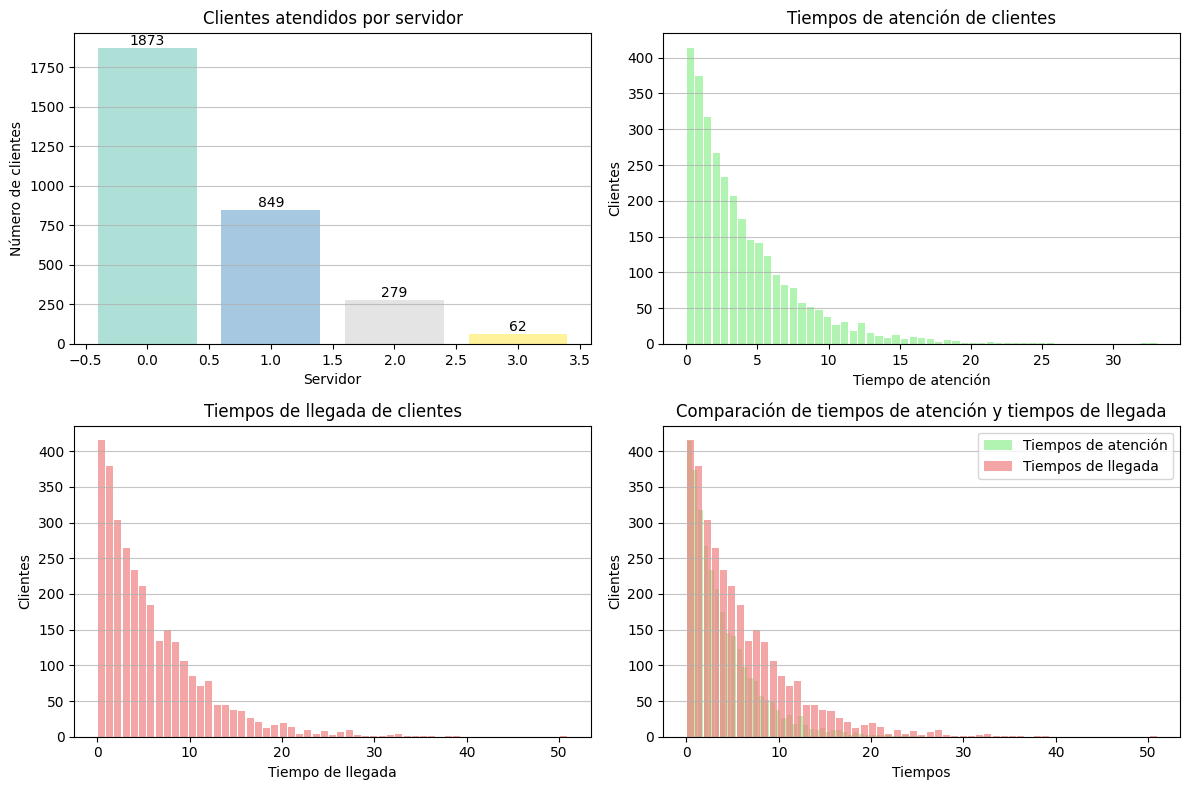

In [32]:
# Ejecutar simulación
simular_servidores(n_servidores,promedio_tiempo_llegada,promedio_tiempo_servicio,tiempo_total_atencion,)